### Imports and Downloads

In [37]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from scipy.stats import pearsonr
from scipy.stats import ttest_rel
from graph_coloring_problem import obtain_colours
from adjacent_matrix import create_adjacent_matrix

### Loading Catalonia's Map

In [38]:
def number_to_discrete_color(index, total_colors):
    cmap = plt.get_cmap('tab20b', total_colors)
    rgba = cmap(index / total_colors)
    return mcolors.to_hex(rgba)

In [39]:
# Load the shapefile
gdf = gpd.read_file('./COMARQUES/divisions-administratives-v2r1-comarques-250000-20240701.shp')
gdf['NOM'] = gdf['NOMCOMAR']
# gdf = gpd.read_file('./MUNICIPIS/divisions-administratives-v2r1-municipis-250000-20240701.shp')
# gdf['NOM'] = gdf['NOMMUNI']

matrix = create_adjacent_matrix(gdf)

### Searching the best parameters

In [14]:
population_sizes = [100, 200, 300, 500, 800, 1000]
mutation_probs = [0.05, 0.1, 0.15, 0.2]
max_generations = [200, 500, 800]
crossover_types = ['one-point', 'two-point', 'uniform']

results = []

for population_size in population_sizes:
    for prob_mutation in mutation_probs:
        for max_gen in max_generations:
            for crossover_type in crossover_types:
                
                num_colors_list = []
                for _ in range(10):
                    print(population_size, prob_mutation, max_gen, crossover_type)
                    _, report_data, _, _ = obtain_colours(matrix, population_size=population_size,
                                                        prob_mutation=prob_mutation, 
                                                        max_generations=max_gen,
                                                        crossover_type=crossover_type, 
                                                        crossover_prob=0.5)

                    num_colors_list.append(report_data['Number colors'])

                mean_num_colors = np.mean(num_colors_list)
                
                results.append({
                    'Population Size': population_size,
                    'Mutation Probability': prob_mutation,
                    'Max Generations': max_gen,
                    'Crossover Type': crossover_type,
                    'Mean Number of Colors': mean_num_colors
                })

results_df = pd.DataFrame(results)

100 0.05 200 one-point
Number of colors: 7, Generation: 27
Number of colors: 6, Generation: 42
100 0.05 200 one-point
Number of colors: 7, Generation: 34
Number of colors: 6, Generation: 27
100 0.05 200 one-point
Number of colors: 7, Generation: 25
Number of colors: 6, Generation: 40
100 0.05 200 one-point
Number of colors: 7, Generation: 26
Number of colors: 6, Generation: 35
Number of colors: 5, Generation: 34
100 0.05 200 one-point
Number of colors: 7, Generation: 23
Number of colors: 6, Generation: 35
100 0.05 200 one-point
Number of colors: 7, Generation: 38
Number of colors: 6, Generation: 40
100 0.05 200 one-point
Number of colors: 7, Generation: 28
Number of colors: 6, Generation: 45
Number of colors: 5, Generation: 42
100 0.05 200 one-point
Number of colors: 7, Generation: 42
Number of colors: 6, Generation: 26
Number of colors: 5, Generation: 53
100 0.05 200 one-point
Number of colors: 7, Generation: 46
Number of colors: 6, Generation: 35
100 0.05 200 one-point
Number of colo

In [15]:
best_combination = results_df.loc[results_df['Mean Number of Colors'].idxmin()]

print("Best combination of parameters:", best_combination)

Best combination of parameters: Population Size                500
Mutation Probability          0.05
Max Generations                500
Crossover Type           two-point
Mean Number of Colors          4.0
Name: 112, dtype: object


### Analysis with the best Parameters

In [18]:
# Best parameters
best_population_size = 500
best_mutation_prob = 0.05
best_max_generations = 500
best_crossover_type = 'two-point'

results_df2 = pd.DataFrame(columns=["Num Colors", "Execution Time", "Generations", "Fitness Function Calls"])

for i in range(10):
    best_palette, results_df, _, execution_time = obtain_colours(
        matrix,
        population_size=best_population_size,
        prob_mutation=best_mutation_prob,
        max_generations=best_max_generations,
        crossover_type=best_crossover_type,
        crossover_prob=0.5 
    )
    
    new_row = {
        "Num Colors": results_df['Number colors'],
        "Execution Time": execution_time,
        "Generations": results_df['Generation'],
        "Fitness Function Calls": results_df['Fitness evaluations'],
    }
    results_df2 = results_df2._append(new_row, ignore_index=True)

Number of colors: 7, Generation: 41
Number of colors: 6, Generation: 52
Number of colors: 5, Generation: 53
Number of colors: 4, Generation: 63


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10072\779746927.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df2 = results_df2._append(new_row, ignore_index=True)


Number of colors: 7, Generation: 56
Number of colors: 6, Generation: 56
Number of colors: 5, Generation: 53
Number of colors: 4, Generation: 62
Number of colors: 7, Generation: 40
Number of colors: 6, Generation: 51
Number of colors: 5, Generation: 55
Number of colors: 7, Generation: 56
Number of colors: 6, Generation: 46
Number of colors: 5, Generation: 53
Number of colors: 4, Generation: 124
Number of colors: 7, Generation: 51
Number of colors: 6, Generation: 59
Number of colors: 5, Generation: 69
Number of colors: 4, Generation: 77
Number of colors: 7, Generation: 57
Number of colors: 6, Generation: 50
Number of colors: 5, Generation: 53
Number of colors: 4, Generation: 82
Number of colors: 7, Generation: 48
Number of colors: 6, Generation: 45
Number of colors: 5, Generation: 55
Number of colors: 4, Generation: 58
Number of colors: 7, Generation: 40
Number of colors: 6, Generation: 46
Number of colors: 5, Generation: 50
Number of colors: 7, Generation: 46
Number of colors: 6, Genera

In [22]:
results_df2

,Num Colors,Execution Time,Generations,Fitness Function Calls
0,4.0,8.349662,209.0,104500.0
1,4.0,8.565622,227.0,113500.0
2,5.0,7.539916,146.0,73000.0
3,4.0,9.112735,279.0,139500.0
4,4.0,8.713270,256.0,128000.0
5,4.0,8.524087,242.0,121000.0
6,4.0,8.162718,206.0,103000.0
7,5.0,7.460651,136.0,68000.0
8,4.0,8.565091,229.0,114500.0
9,5.0,8.159584,163.0,81500.0


### Plots

In [31]:
color_numbers, report_data, report_data2, time = obtain_colours(matrix, population_size = 500, prob_mutation = 0.05, max_generations = 500,
                        crossover_type = 'two-point', crossover_prob = 0.5)

# Get the unique numbers from the list and assign each a color
unique_numbers = list(set(color_numbers))
total_unique_colors = len(unique_numbers)

# Create a dictionary mapping each unique number to a color
number_color_mapping = {num: number_to_discrete_color(i, total_unique_colors) for i, num in enumerate(unique_numbers)}

# Now map each comarca name to its corresponding color based on its number
comarca_colors = {name: number_color_mapping[num] for name, num in zip(gdf['NOM'], color_numbers)}

Number of colors: 7, Generation: 19
Number of colors: 6, Generation: 49
Number of colors: 5, Generation: 51
Number of colors: 4, Generation: 63


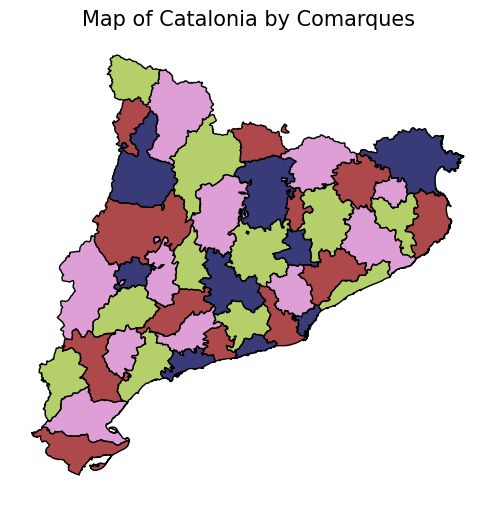

In [32]:
# Create a new column for colors based on the comarca names
gdf['color'] = gdf['NOM'].map(comarca_colors).fillna('#FFFFFF')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
gdf.plot(ax=ax, color=gdf['color'], edgecolor='black')
ax.set_title("Map of Catalonia by Comarques", fontsize=15)
plt.axis('off')
plt.show()

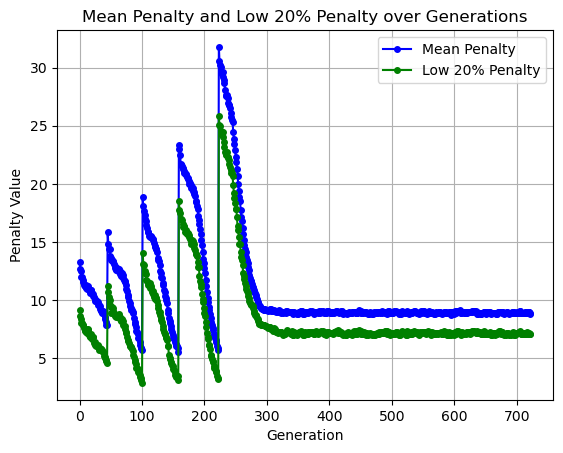

In [27]:
plt.plot(report_data2['Generation'], report_data2['Mean Penalty'], label='Mean Penalty', marker='o', markersize=4, color='blue')

# Plot for Low 20% Penalty
plt.plot(report_data2['Generation'], report_data2['Low 20% penalty'], label='Low 20% Penalty', marker='o', markersize=4, color='green')

# Add labels and title
plt.xlabel('Generation')
plt.ylabel('Penalty Value')
plt.title('Mean Penalty and Low 20% Penalty over Generations')

# Add a legend
plt.legend()
plt.grid(True)
plt.show()

### Sort comarques

In [40]:
data_dict = {
    "Alt Camp": 32, "Alt Empordà": 12, "Alt Penedès": 27, "Alt Urgell": 6,
    "Alta Ribagorça": 3, "Anoia": 28, "Bages": 22, "Baix Camp": 35,
    "Baix Ebre": 42, "Baix Empordà": 13, "Baix Llobregat": 25, "Baix Penedès": 33,
    "Barcelonès": 24, "Berguedà": 8, "Cerdanya": 9, "Conca de Barberà": 31,
    "Garraf": 26, "Garrigues": 37, "Garrotxa": 11, "Gironès": 15, "Maresme": 17,
    "Montsià": 43, "Noguera": 5, "Osona": 19, "Pallars Jussà": 4,
    "Pallars Sobirà": 2, "Pla d'Urgell": 38, "Pla de l'Estany": 14,
    "Priorat": 36, "Ribera d'Ebre": 40, "Ripollès": 10, "Segarra": 29,
    "Segrià": 39, "Selva": 16, "Solsonès": 7, "Tarragonès": 35,
    "Terra Alta": 41, "Urgell": 30, "Val d'Aran": 1, "Vallès Occidental": 23,
    "Vallès Oriental": 18, "Moianès": 21, "Lluçanès": 20
}

# Create a list of names ordered by their corresponding values in data_dict
ordered_names = sorted(data_dict, key=data_dict.get)

# Reorder gdf based on this ordered list
gdf_sorted = gdf.set_index('NOMCOMAR').reindex(ordered_names).reset_index()

# Create an index map for the ordered names
index_map = {name: idx for idx, name in enumerate(ordered_names)}

# Create a new reordered adjacency matrix
adjacency_matrix_sorted = np.zeros_like(matrix)

# Fill in the reordered adjacency matrix
for new_idx, name in enumerate(ordered_names):
    original_idx = index_map[name]
    adjacency_matrix_sorted[new_idx, :] = matrix[original_idx, :]
    adjacency_matrix_sorted[:, new_idx] = matrix[:, original_idx]

In [ ]:
population_sizes = [100, 200, 300, 500, 800, 1000]
mutation_probs = [0.05, 0.1, 0.15, 0.2]
max_generations = [200, 500, 800]
crossover_types = ['one-point', 'two-point', 'uniform']

results = []

for population_size in population_sizes:
    for prob_mutation in mutation_probs:
        for max_gen in max_generations:
            for crossover_type in crossover_types:
                
                num_colors_list = []
                for _ in range(10):
                    print(population_size, prob_mutation, max_gen, crossover_type)
                    _, report_data, _, _ = obtain_colours(adjacency_matrix_sorted, population_size=population_size,
                                                        prob_mutation=prob_mutation, 
                                                        max_generations=max_gen,
                                                        crossover_type=crossover_type, 
                                                        crossover_prob=0.5)

                    num_colors_list.append(report_data['Number colors'])

                mean_num_colors = np.mean(num_colors_list)
                
                results.append({
                    'Population Size': population_size,
                    'Mutation Probability': prob_mutation,
                    'Max Generations': max_gen,
                    'Crossover Type': crossover_type,
                    'Mean Number of Colors': mean_num_colors
                })

results_df = pd.DataFrame(results)
results_df.to_csv('sorted.csv', index=False)

### T-test Comarques sorted

In [41]:
df1 = pd.read_csv('results.csv')
df2 = pd.read_csv('sorted.csv')

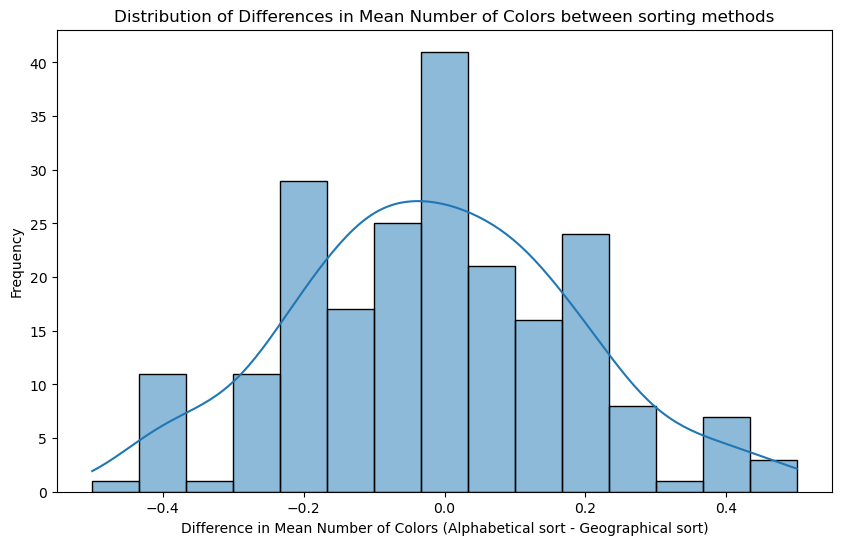

(-1.0183536629804273, 0.3096544724065213)

In [42]:
# Label each dataset
df1["Data Origin"] = "Alphabetical sort"
df2["Data Origin"] = "Geographical sort"

# Combine dataframes
combined_df = pd.concat([df1, df2], ignore_index=True)

# Pivot to align by hyperparameters, making comparison easier
pivot_df = combined_df.pivot_table(index=["Population Size", "Mutation Probability", "Max Generations", "Crossover Type"],
                                   columns="Data Origin",
                                   values="Mean Number of Colors").dropna()

# Perform paired t-test
t_stat, p_value = ttest_rel(pivot_df["Alphabetical sort"], pivot_df["Geographical sort"])

# Plotting differences for visualization
plt.figure(figsize=(10, 6))
pivot_df["Difference"] = pivot_df["Alphabetical sort"] - pivot_df["Geographical sort"]
sns.histplot(pivot_df["Difference"], kde=True)
plt.title("Distribution of Differences in Mean Number of Colors between sorting methods")
plt.xlabel("Difference in Mean Number of Colors (Alphabetical sort - Geographical sort)")
plt.ylabel("Frequency")
plt.show()

# Results
t_stat, p_value